In [36]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
df=pd.read_csv(r"C:\Fz\RW\randomwalk-ds-assessment\books.csv")


num_rows = len(df.index)
num_cols = len(df.columns)

print('Number of Rows: ' + str(num_rows))
print('Number of Columns: ' + str(num_cols))

Number of Rows: 399
Number of Columns: 24


In [37]:
sum(df['original_title'].isnull())

36

In [38]:
temp = df[df['original_title'].notna()]

num_unique_books = temp['book_id'].nunique()

print('Number of unique books: ' + str(num_unique_books))

Number of unique books: 363


In [39]:
df['average_rating'].mean()

3.9837844611528817

In [40]:
df['original_publication_year'].value_counts()[2000]

8

In [41]:
ratings = df['work_ratings_count'].to_list()
ind = ratings.index(max(ratings))
df['title'][ind]

'The Diary of a Young Girl'

In [42]:
def bucket_values(value):
    floor_value = int(value)
    remainder = value - floor_value 

    if remainder < 0.25:  
        return floor_value
    elif remainder < 0.75:  
        return floor_value + 0.5
    else:  
        return floor_value + 1

for i in range(len(df['average_rating'])):
  df['average_rating'][i] = bucket_values(df['average_rating'][i])


In [43]:
df['average_rating']

0      4.0
1      3.5
2      4.0
3      4.0
4      4.5
      ... 
394    4.5
395    4.0
396    3.5
397    4.0
398    4.0
Name: average_rating, Length: 399, dtype: float64

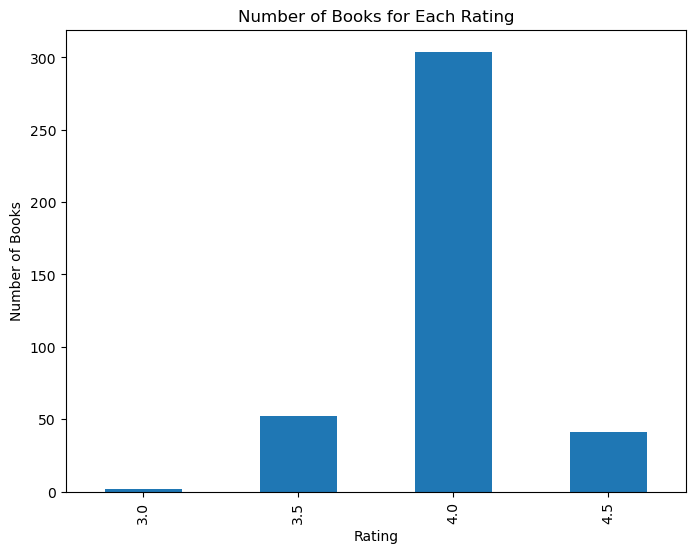

In [44]:
rating_counts = df['average_rating'].value_counts().sort_index()

rates = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Number of Books for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()